# Korelasyon Testleri
- Korelasyon testleri iki örneğin ilişkili olup olmadığını kontrol etmek için kullanılır.sti

#### Kullanılacak Korelasyon Testleri
- Pearson Korelasyon Katsayısı
- Spearman'ın Sıra Korelasyonu
- Kendall'ın Sıra Korelasyonu
- Ki-Kare Testi

## 1) Pearson korelasyon katsayısı
- iki sürekli değişken arasındaki doğrusal bir ilişkinin gücünü ve yönünü gösterir. Pearson korelasyon katsayısı popülasyon parametresi olarak rho (ρ), örneklem istatistiği olarak “r” ile temsil edilir.
- **Parametrik** bir testtir. Verininn normal dağıldığını ve eş varyansa sahip olduğunu varsayar.
- Sadece 2 sürekli değişken arasındaki ilişkiyi ölçebiliriz.
- Özetle iki örneğin doğrusal bir ilişkiye sahip olup olmadığına bakar.
- H0: İki örnek bağımsızdır.(**ρ=0**)
- H1: İki örnek bağımlıdır.(**ρ≠0**)

In [14]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [76]:
# Veri setini yükleyin : Boy-Kilo veri seti
df = pd.read_csv("SOCR-HeightWeight.csv")
df.head(3)

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269


**Soru 1:** Bireylerin boyları ve kiloları arasındaki ilişki miktarını ve yönünü
0,05 anlamlılık düzeyinde araştırın.
- **H0:** Boy ile kilo arasında anlamlı bir doğrusal ilişki yoktur.(ρ=0)
- **H1:** Boy ile kilo arasında anlamlı bir doğrusal ilişki vardır.(ρ≠0)

In [91]:
#öncelikle parametrik test olduğu için normallik varsayımını kontrol etmemiz gerekir.
# Height değişkenini seçelim
boy = df['Height(Inches)'].dropna()
# D'Agostino'nun K² testi
from scipy.stats import normaltest
stat_d, p3 = normaltest(boy)
print('stat=%.3f, p=%.3f' % (stat_d, p3))
#Sonucu yorumlama
if p3 > 0.05:
 print('H0 kabul edilir.Veri normal dağılmıştır.')
else:
 print('H0 reddedilir.Veri normal dağılmamıştır.')

stat=1.433, p=0.488
H0 kabul edilir.Veri normal dağılmıştır.


In [93]:
# Weight değişkenini seçelim
kilo = df['Height(Inches)'].dropna()
# D'Agostino'nun K² testi
stat_d, p3 = normaltest(kilo)
print('stat=%.3f, p=%.3f' % (stat_d, p3))
#Sonucu yorumlama
if p3 > 0.05:
 print('H0 kabul edilir.Veri normal dağılmıştır.')
else:
 print('H0 reddedilir.Veri normal dağılmamıştır.')

stat=1.433, p=0.488
H0 kabul edilir.Veri normal dağılmıştır.


**Veri normal dağılıyor ve sadece 2 değişkenin birbiri ile ilişkili olup olmadığını kontrol edeceğiz.**

In [101]:
from scipy.stats import pearsonr

In [109]:
#Pearson Korelasyon Katsayısı
stat1, p1 = pearsonr(boy, kilo)
print('stat=%.3f, p=%.3f' % (stat1, p1))

stat=1.000, p=0.000


In [111]:
#Sonucu yorumlama
if p1 > 0.05:
 print('H0 kabul edilir.Boy ile kilo arasında anlamlı bir doğrusal ilişki yoktur.(ρ=0)')
else:
 print('H0 reddedilir.Boy ile kilo arasında anlamlı bir doğrusal ilişki vardır.(ρ≠0)')

H0 reddedilir.Boy ile kilo arasında anlamlı bir doğrusal ilişki vardır.(ρ≠0)


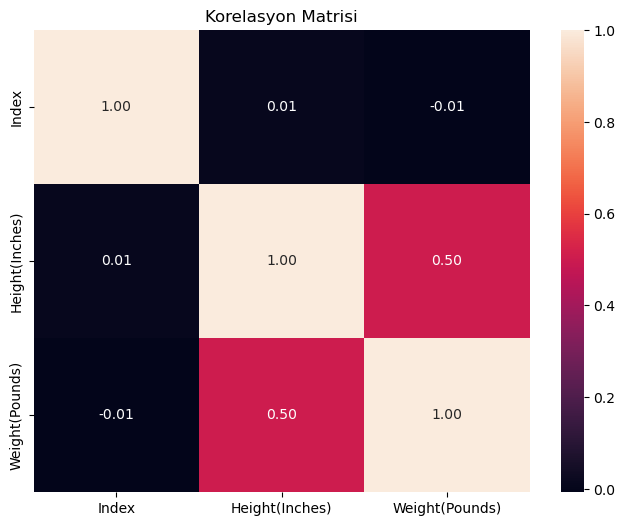

In [128]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title('Korelasyon Matrisi')
plt.show()

**Soru2:** Normal dağıldığı varsayılan biyoistatistik dersi sınav sonuçları
arasındaki ilişki miktarını ve yönünü
0,05 anlamlılık düzeyinde araştırın.
- **H0:** biyoistatistik dersi sınav sonuçları
arasında anlamlı bir doğrusal ilişki yoktur.(ρ=0)
- **H1:** biyoistatistik dersi sınav sonuçları
arasındao arasında anlamlı bir doğrusal ilişki vardır.(ρ≠0)

In [135]:
midterm = [46, 45, 56, 62, 48, 59, 61, 62, 84, 59, 68]
final = [56, 59, 62, 75, 74, 76, 89, 71, 79, 65, 78]
data = pd.DataFrame({'Midterm': midterm, 'Final': final})
data.head()

,Midterm,Final
0,46,56
1,45,59
2,56,62
3,62,75
4,48,74


In [151]:
#Pearson Korelasyon Katsayısı
stat2, p2 = pearsonr(data["Midterm"],data["Final"] )
print('stat=%.3f, p=%.3f' % (stat2, p2))

stat=0.612, p=0.045


In [168]:
#Sonucu yorumlama
if p1 > 0.05:
 print("H0 kabul edilir.Biyoistatistik dersi sınav sonuçları arasında anlamlı bir doğrusal ilişki yoktur.(ρ=0)")
else:
 print('H0 reddedilir.Biyoistatistik dersi sınav sonuçları arasında arasında anlamlı bir doğrusal ilişki vardır.(ρ≠0)')

H0 reddedilir.Biyoistatistik dersi sınav sonuçları arasında arasında anlamlı bir doğrusal ilişki vardır.(ρ≠0)


## 2)Spearman'ın Sıra Korelasyonu
- Parametrik olmayan testtir.
- Spearman korelasyon katsayısı değişkenlerin birinin ordinal veri tipinde olduğu ve pearson korelasyon katsayısının sağlanmadığı durumlarda kullanılmalıdır.
- Sadece doğrusal değil monoton ilişkileri de ölçer.
- Örneğin sponsor bütçesi ile yarışı bitirme derecesi ilişkisinin incelenmesi.

In [161]:
# Veri setini yükleyin : Şarap kalitesi veri seti
df = pd.read_csv("WineQT.csv")
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2


**Soru 3 :** Şarap kalitesi ile alkol arasındaki ilişki miktarını ve yönünü
0,05 anlamlılık düzeyinde araştırın.
- **H0:** Şarap kalitesi ile alkol arasında anlamlı bir ilişki yoktur.(ρ=0)
- **H1:** Şarap kalitesi ile alkol arasında anlamlı bir ilişki vardır.(ρ≠0)

In [177]:
from scipy.stats import spearmanr
data1=df["alcohol"].dropna()
data2=df["quality"].dropna()

In [179]:
#Spearman sıra korelasyon testi
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))

stat=0.495, p=0.000


In [182]:
#sonucu yorumlama
if p > 0.05:
 print('H0 kabul edilir.Şarap kalitesi ile alkol arasında anlamlı bir ilişki yoktur.(ρ=0)')
else:
 print('H1 kabul edilir.Şarap kalitesi ile alkol arasında anlamlı bir ilişki vardır.(ρ≠0)')

H1 kabul edilir.Şarap kalitesi ile alkol arasında anlamlı bir ilişki vardır.(ρ≠0)


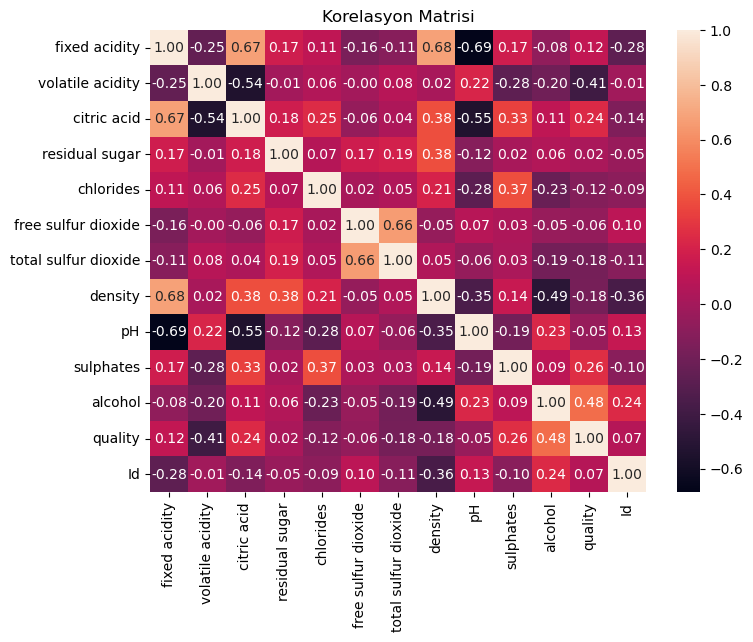

In [184]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title('Korelasyon Matrisi')
plt.show()

**Soru 4 :** Uçucu asit(volatile acidity) ile serbest kükürt dioksit(free sulfur dioxide) arasındaki ilişki miktarını ve yönünü
0,05 anlamlılık düzeyinde araştırın.
- **H0:** Uçucu asit(volatile acidity) ile serbest kükürt dioksit(free sulfur dioxide) arasında anlamlı bir ilişki yoktur.(ρ=0)
- **H1:** Uçucu asit(volatile acidity) ile serbest kükürt dioksit(free sulfur dioxide) arasında anlamlı bir ilişki vardır.(ρ≠0)

In [206]:
data1=df["volatile acidity"].dropna()
data2=df["free sulfur dioxide"].dropna()

In [208]:
#Spearman sıra korelasyon testi
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))

stat=0.021, p=0.474


In [213]:
#sonucu yorumlama
if p > 0.05:
 print('H0 kabul edilir.Uçucu asit(volatile acidity) ile serbest kükürt dioksit(free sulfur dioxide) arasında anlamlı bir ilişki yoktur.(ρ=0)')
else:
 print('H1 kabul edilir.Uçucu asit(volatile acidity) ile serbest kükürt dioksit(free sulfur dioxide) arasında anlamlı bir ilişki vardır.(ρ≠0)')

H0 kabul edilir.Uçucu asit(volatile acidity) ile serbest kükürt dioksit(free sulfur dioxide) arasında anlamlı bir ilişki yoktur.(ρ=0)


##  Kendall'ın Sıra Korelasyonu
- Bir diğer non-parametric ve sıralı korelasyon katsayısıdır.
- Miktarlara göre sıralandığında verilerin sıralamasındaki benzerlikleri test etmek için kullanılır.
- Başka kaynağa göre de ik, kaynağın monotonik ilişkisi olup olmadığını test eder.
- İncelenen değişkenlerin biri veya ikisi sıralı ise kullanılabilir.
- Hipotezleri yine : 
- **H0:** İlişki yoktur.
- **H1:** İlişki vardır. Şeklinde kurulur

In [404]:
# Veri setini yükleyin : Öğrenci Alkol Tüketimi
df = pd.read_csv("student-mat.csv")
df.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10


In [264]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [282]:
df["Walc"].nunique()

5

In [287]:
#Walc: Haftalık alkol tüketim sıklığı
#G3: Final notu (okul başarısını temsil eden sürekli bir değişken).

**Soru 5:** Walc ile G3 notu arasındaki ilişki miktarını ve yönünü
0,05 anlamlılık düzeyinde araştırın.
- **H0:** Walc ile G3 arasında anlamlı bir ilişki yoktur.(ρ=0)
- **H1:** Walc ile G3 arasında anlamlı bir ilişki vardır.(ρ≠0)

In [305]:
from scipy.stats import kendalltau
data1 = df["Walc"]
data2 = df["G3"]
stat, p = kendalltau(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('H0 kabul edilir,Walc ile G3 arasında anlamlı bir ilişki yoktur.(ρ=0)')
else:
 print('H0 reddedilir,Walc ile G3 arasında anlamlı bir ilişki vardır.(ρ≠0)')

stat=-0.083, p=0.033
H0 reddedilir,Walc ile G3 arasında anlamlı bir ilişki vardır.(ρ≠0)


**Soru 6:** Yaş (age) ile final notu (G3) arasındaki ilişki miktarını ve yönünü
0,05 anlamlılık düzeyinde araştırın.
- **H0:** Yaş (age) ile final notu (G3) arasında anlamlı bir ilişki yoktur.(ρ=0)
- **H1:** Yaş (age) ile final notu (G3) arasında anlamlı bir ilişki vardır.(ρ≠0)

In [303]:
from scipy.stats import kendalltau
data1 = df["age"]
data2 = df["G3"]
stat, p = kendalltau(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('H0 kabul edilir,Yaş (age) ile final notu (G3) arasında anlamlı bir ilişki yoktur.(ρ=0)')
else:
 print('H0 reddedilir,Yaş (age) ile final notu (G3) arasında anlamlı bir ilişki vardır.(ρ≠0)')

stat=-0.134, p=0.000
H0 reddedilir,Yaş (age) ile final notu (G3) arasında anlamlı bir ilişki vardır.(ρ≠0)


**Soru 7:** İki basketbol koçunun 12 oyuncusunu en kötüden en iyiye doğru sıraladığını varsayalım.İki koçun sıralaması arasındaki korelasyonu hesaplayın.
- **H0:** iki koçun oyunculara atadığı sıralamalar arasında istatistiksel olarak anlamlı bir korelasyon yoktur.(ρ=0)
- **H1:** iki koçun oyunculara atadığı sıralamalar arasında istatistiksel olarak anlamlı bir korelasyon vardır.(ρ≠0)

In [307]:
data = {
    "Player": ["AJ", "Ben", "Conner", "Duane", "Elliot", "Frank", "Greg", "Hank", "Isaiah", "Jim", "Kurt", "Luke"],
    "Coach #1": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    "Coach #2": [1, 2, 3, 5, 4, 7, 6, 8, 10, 9, 11, 12]
}

df = pd.DataFrame(data)

In [309]:
data1 = df["Coach #1"]
data2 = df["Coach #2"]
stat, p = kendalltau(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('H0 kabul edilir,Yaş (age) ile final notu (G3) arasında anlamlı bir ilişki yoktur.(ρ=0)')
else:
 print('H0 reddedilir,Yaş (age) ile final notu (G3) arasında anlamlı bir ilişki vardır.(ρ≠0)')

stat=0.909, p=0.000
H0 reddedilir,Yaş (age) ile final notu (G3) arasında anlamlı bir ilişki vardır.(ρ≠0)


## Ki-Kare Testi

- Ki-Kare testi gözlenen frekanslarla beklenen frekanslar arasındaki farkın 
anlamlı olup olmadığını test etme temeline dayanır.
- Yani bir doğum kliniğinde doğacak 100 bebeğin 50’sinin
erkek, 50’sinin kız olması beklenir. Bunlar beklenen
frekanslardır.
- Ancak doğan 100 bebeğin he zaman 50’si erkek 50’si kız
olmayabilir. Bir klinikte doğan 100 bebeğin 58’inin erkek,
42’sinin kız olduğunu varsayalım. Bunlar da gözlenen
frekanslard
- Bu örnekte beklenen ve gözlenen frekanslar arasında erkekler
için +8 ve kızlar için -8’lik bir fark vardı.
- **Bu farkın istatistiksel olarak anlamlı olup olmadığının test 
edilmesi ki-kare testinin temel mantığını oluşturr**
- Ki kare testinde kategorik veriler kullanılır.
- Ayrıca ölçümle belirtildiği halde sonradan nitel veri haline
dönüştürülmüş verilerin incelenmesinde de ki-kare testi kullanılır
- Hemoglobin değerlerinin ölçülmesinden sonra hemoglobin
değeri belirli bir değerden az olanların anemik, diğerlerinin normal
olarak nitelendirilmesi gibi.


In [321]:
#Titanik veri seti
df = pd.read_csv("titanic.csv")
df.head(3)

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1


In [325]:
df.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18', '2urvived'],
      dtype='object')

**Soru 8 :** Cinsiyetin hayatta kalma durumunu etkileyip etkilemediğini inceleyin.
- **H0:** Cinsiyetin hayatta kalma durumu üzerinde etkisi yoktur.
- **H1:** Cinsiyetin hayatta kalma durumu üzerinde etkisi vardır.

In [360]:
# Cinsiyet ve hayatta kalma durumu için frekans tablosunu oluşturun
contingency_table = pd.crosstab(df['Sex'], df['2urvived'])
print(contingency_table)

2urvived    0    1
Sex               
0         734  109
1         233  233


In [329]:
from scipy.stats import chi2_contingency

In [347]:
## Ki-Kare Testi
stat, p, dof, expected = chi2_contingency(contingency_table)
print('stat=%.3f, p=%.3f' % (stat, p))

stat=211.755, p=0.000


In [351]:
#Sonucun Yorumlanması
if p > 0.05:
 print('H0 kabul edilir.Cinsiyetin hayatta kalma durumu üzerinde etkisi yoktur.')
else:
 print('H1 kabul edilir.Cinsiyetin hayatta kalma durumu üzerinde etkisi vardır.')

H1 kabul edilir.Cinsiyetin hayatta kalma durumu üzerinde etkisi vardır.


**Soru 9 :** Yolcu sınıfının hayatta kalma durumunu etkileyip etkilemediğini inceleyiniz.
- H0: Yolcu sınıfının hayatta kalma durumu üzerinde etkisi yoktur.
- H1: Yolcu sınıfının hayatta kalma durumu üzerinde etkisi vardır.

In [364]:
contingency_table = pd.crosstab(df['Pclass'], df['2urvived'])
print(contingency_table)

2urvived    0    1
Pclass            
1         187  136
2         190   87
3         590  119


In [366]:
## Ki-Kare Testi
stat, p, dof, expected = chi2_contingency(contingency_table)
print('stat=%.3f, p=%.3f' % (stat, p))

stat=78.793, p=0.000


In [370]:
#Sonucun Yorumlanması
if p > 0.05:
 print('H0 kabul edilir.Yolcu sınıfının hayatta kalma durumu üzerinde etkisi yoktur.')
else:
 print('H1 kabul edilir.Yolcu sınıfının hayatta kalma durumu üzerinde etkisi vardır.')

H1 kabul edilir.Yolcu sınıfının hayatta kalma durumu üzerinde etkisi vardır.
